# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

records = 1

print('Beginning Data Retrieval')
print('------------------------------')

for citi in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={citi}&appid={weather_api_key}&units=imperial"
    response = requests.get(url).json()
    time.sleep(1.1)

    try:
        city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"processing record {records} | {citi}")
        records += 1
    except KeyError:
        print('city not found, skipping to next!')

Beginning Data Retrieval
------------------------------
processing record 1 | poum
processing record 2 | beringovskiy
processing record 3 | bambous virieux
processing record 4 | hithadhoo
processing record 5 | bilibino
processing record 6 | chokurdakh
processing record 7 | busselton
processing record 8 | hovd
processing record 9 | ribeira grande
processing record 10 | rikitea
processing record 11 | kryve ozero
processing record 12 | svetlaya
processing record 13 | hobart
processing record 14 | ushuaia
processing record 15 | hermanus
processing record 16 | new norfolk
processing record 17 | abadan
processing record 18 | sola
processing record 19 | portland
processing record 20 | tuktoyaktuk
processing record 21 | hilo
processing record 22 | boralday
processing record 23 | san patricio
city not found, skipping to next!
city not found, skipping to next!
processing record 24 | saskylakh
processing record 25 | novotroitskaya
processing record 26 | denizli
processing record 27 | skelleftea
p

processing record 232 | clyde river
city not found, skipping to next!
processing record 233 | san luis
processing record 234 | shelburne
processing record 235 | englewood
processing record 236 | mtinko
processing record 237 | edson
processing record 238 | wladyslawowo
processing record 239 | trairi
processing record 240 | mitu
processing record 241 | wynyard
processing record 242 | iqaluit
processing record 243 | mollendo
processing record 244 | virovitica
processing record 245 | yerbogachen
processing record 246 | praia da vitoria
processing record 247 | jian
processing record 248 | kriel
processing record 249 | nyurba
processing record 250 | katsuura
processing record 251 | melo
processing record 252 | xuddur
processing record 253 | kuusamo
city not found, skipping to next!
processing record 254 | camopi
processing record 255 | saint john
processing record 256 | shaoxing
city not found, skipping to next!
processing record 257 | batagay-alyta
processing record 258 | vila velha
process

processing record 459 | touros
processing record 460 | katangli
processing record 461 | lensk
processing record 462 | ozinki
processing record 463 | gaya
processing record 464 | akyab
processing record 465 | talaya
processing record 466 | tautira
processing record 467 | klaksvik
processing record 468 | rio grande
processing record 469 | necochea
processing record 470 | vrangel
processing record 471 | najran
processing record 472 | snasa
processing record 473 | agirish
processing record 474 | sechura
processing record 475 | soto la marina
processing record 476 | suez
processing record 477 | eureka
processing record 478 | yumen
processing record 479 | marsaxlokk
processing record 480 | kirakira
processing record 481 | vostok
processing record 482 | severobaykalsk
processing record 483 | linares
processing record 484 | turochak
processing record 485 | waitati
processing record 486 | dauriya
processing record 487 | pitea
processing record 488 | menongue
processing record 489 | prata
proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create the DataFrame

weather_dict = {"City": city,
                "Lat": lat,
                "Lng": lng,
                "Max Temp (F)": max_temp,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Country": country,
                "Wind Speed": wind_speed,
                "Date": date}

In [6]:
#Export to a .csv

weather_data_df = pd.DataFrame(weather_dict)

weather_data_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Country,Wind Speed,Date
0,Poum,-20.23,164.02,81.32,83,100,NC,14.09,1609377964
1,Beringovskiy,63.05,179.32,4.26,93,94,RU,16.89,1609377965
2,Bambous Virieux,-20.34,57.76,77.00,88,40,MU,14.99,1609377967
3,Hithadhoo,-0.60,73.08,82.00,78,3,MV,9.08,1609377968
4,Bilibino,68.05,166.44,-32.35,80,99,RU,2.42,1609377969


In [7]:
weather_data_df.to_csv("../output_data/WeatherDataCities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
hum_100 = weather_data_df.loc[weather_data_df['Humidity']>100]

hum_100.shape[0]


0

In [9]:
print(f"There are {hum_100.shape[0]} cities with humidity greater than 100.")

There are 0 cities with humidity greater than 100.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f" Since we have {hum_100.shape[0]} cities with humidity greater than 100, there is no need to clean the DataFrame.")

 Since we have 0 cities with humidity greater than 100, there is no need to clean the DataFrame.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

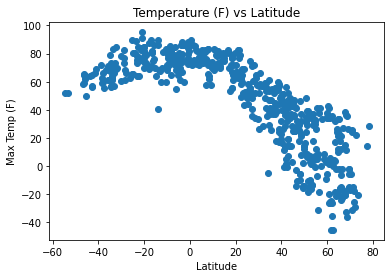

In [11]:
# Now we can use plt.scatter to create our graphs "Latitude Vs Temperature"
plt.scatter(weather_data_df["Lat"],weather_data_df["Max Temp (F)"],marker ="o")
plt.title("Temperature (F) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("../output_data/Latitude vs Temperature (F)")
plt.show()

In [12]:
print(f'The closer a city is to the equator (Lat=0), the warmer the city. The further away a city is from the equator, the cooler the city would be. Notice the plot is forming a curve shape.')

The closer a city is to the equator (Lat=0), the warmer the city. The further away a city is from the equator, the cooler the city would be. Notice the plot is forming a curve shape.


## Latitude vs. Humidity Plot

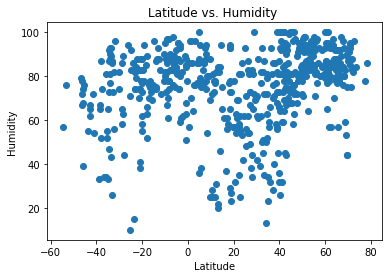

In [13]:
# Now we can use plt.scatter to create our graphs "Latitude vs. Humidity "
plt.scatter(weather_data_df["Lat"],weather_data_df["Humidity"],marker ="o")
plt.title("Latitude vs. Humidity ")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../output_data/Latitude vs Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

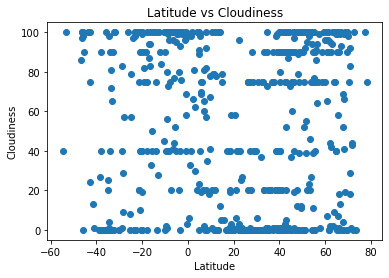

In [14]:
# Now we can use plt.scatter to create our graphs "Latitude vs. Cloudiness"
plt.scatter(weather_data_df["Lat"],weather_data_df["Cloudiness"],marker ="o")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../output_data/Latitude vs Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

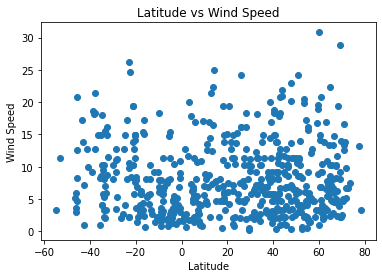

In [15]:
# Now we can use plt.scatter to create our graphs "Latitude Vs Temperature"
plt.scatter(weather_data_df["Lat"],weather_data_df["Wind Speed"],marker ="o")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../output_data/Latitude vs Wind Speed")
plt.show()

## Linear Regression

In [16]:
northen_hemisphere = weather_data_df.loc[pd.to_numeric(weather_data_df['Lat']).astype(float)>0, :]
southern_hemisphere = weather_data_df.loc[pd.to_numeric(weather_data_df['Lat']).astype(float)<0, :]


In [17]:
len(northen_hemisphere)

396

In [18]:
len(southern_hemisphere)

169

In [19]:
len(northen_hemisphere) + len(southern_hemisphere)

565

In [20]:
northen_hemisphere.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Country,Wind Speed,Date
1,Beringovskiy,63.05,179.32,4.26,93,94,RU,16.89,1609377965
4,Bilibino,68.05,166.44,-32.35,80,99,RU,2.42,1609377969
5,Chokurdakh,70.63,147.92,-30.89,85,29,RU,5.03,1609377970
7,Khovd,48.01,91.64,-5.94,78,0,MN,0.36,1609377972
8,Ribeira Grande,38.52,-28.70,59.79,77,98,PT,19.95,1609377974


In [21]:
southern_hemisphere.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Country,Wind Speed,Date
0,Poum,-20.23,164.02,81.32,83,100,NC,14.09,1609377964
2,Bambous Virieux,-20.34,57.76,77.00,88,40,MU,14.99,1609377967
3,Hithadhoo,-0.60,73.08,82.00,78,3,MV,9.08,1609377968
6,Busselton,-33.65,115.33,82.99,43,0,AU,7.00,1609377971
9,Rikitea,-23.12,-134.97,78.44,74,0,PF,10.58,1609377975


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Max Temp and Latitiude on the Northern Hemisphere is -0.84.


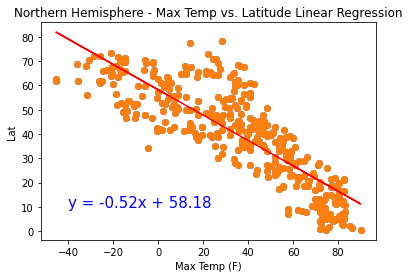

In [27]:
# Create scatter plot and determine line of regression for Northern Hemisphere - Max Temp vs. Latitude Linear Regression¶
plt.scatter(northen_hemisphere['Max Temp (F)'],northen_hemisphere['Lat'])
x = northen_hemisphere['Max Temp (F)']
y = northen_hemisphere['Lat']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between Max Temp and Latitiude on the Northern Hemisphere is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(-40,10),fontsize=15,color="blue")

# Add labels and title to plot
plt.xlabel("Max Temp (F)")
plt.ylabel("Lat")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("../output_data/Northern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Max Temp and Latitiude on the Southern Hemisphere is 0.5.


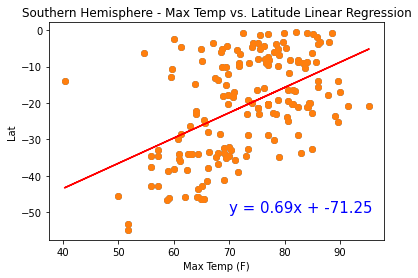

In [28]:
# Create scatter plot and determine line of regression for Southern Hemisphere - Max Temp vs. Latitude Linear Regression¶
plt.scatter(southern_hemisphere['Max Temp (F)'],southern_hemisphere['Lat'])
x = southern_hemisphere['Max Temp (F)']
y = southern_hemisphere['Lat']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between Max Temp and Latitiude on the Southern Hemisphere is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(70,-50),fontsize=15,color="blue")

# Add labels and title to plot
plt.xlabel("Max Temp (F)")
plt.ylabel("Lat")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("../output_data/Southern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Humidity and Latitiude on the Northern Hemisphere is 0.33.


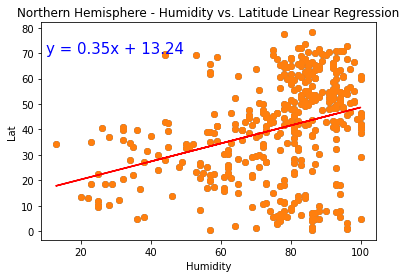

In [24]:
# Create scatter plot and determine line of regression for Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression¶
plt.scatter(northen_hemisphere['Humidity'],northen_hemisphere['Lat'])
x = northen_hemisphere['Humidity']
y = northen_hemisphere['Lat']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between Humidity and Latitiude on the Northern Hemisphere is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(10,70),fontsize=15,color="blue")

# Add labels and title to plot
plt.xlabel("Humidity")
plt.ylabel("Lat")
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig("../output_data/Northern_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Humidity and Latitiude on the Southern Hemisphere is 0.33.


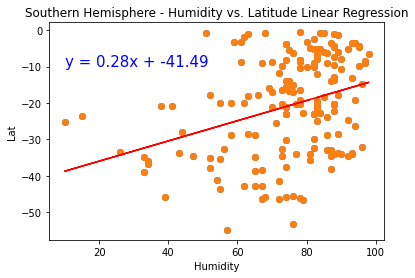

In [25]:
# Create scatter plot and determine line of regression for southern_hemisphere - Humidity vs. Latitude Linear Regression¶
plt.scatter(southern_hemisphere['Humidity'],southern_hemisphere['Lat'])
x = southern_hemisphere['Humidity']
y = southern_hemisphere['Lat']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between Humidity and Latitiude on the Southern Hemisphere is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(10,-10),fontsize=15,color="blue")

# Add labels and title to plot
plt.xlabel("Humidity")
plt.ylabel("Lat")
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig("../output_data/Southern_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Cloudiness and Latitiude on the Northern Hemisphere is 0.21.


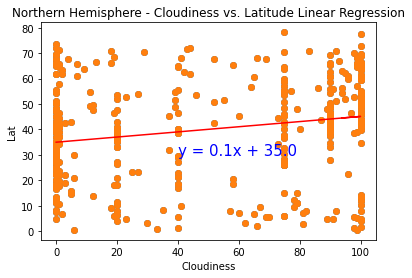

In [30]:
# Create scatter plot and determine line of regression for Northern Hemisphere - Cloudiness vs. Latitude Linear Regression¶
plt.scatter(northen_hemisphere['Cloudiness'],northen_hemisphere['Lat'])
x = northen_hemisphere['Cloudiness']
y = northen_hemisphere['Lat']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between Cloudiness and Latitiude on the Northern Hemisphere is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(40,30),fontsize=15,color="blue")

# Add labels and title to plot
plt.xlabel("Cloudiness")
plt.ylabel("Lat")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig("../output_data/Northern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Cloudiness Latitiude on the Northern Hemisphere is 0.25.


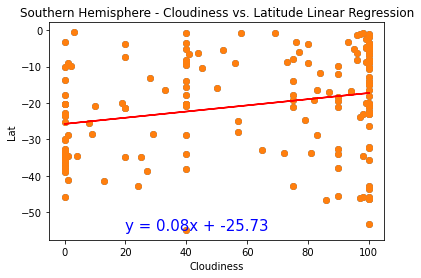

In [31]:
# Create scatter plot and determine line of regression for Southern Hemisphere - Cloudiness vs. Latitude Linear Regression¶
plt.scatter(southern_hemisphere['Cloudiness'],southern_hemisphere['Lat'])
x = southern_hemisphere['Cloudiness']
y = southern_hemisphere['Lat']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between Cloudiness Latitiude on the Northern Hemisphere is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,-55),fontsize=15,color="blue")

# Add labels and title to plot
plt.xlabel("Cloudiness")
plt.ylabel("Lat")
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig("../output_data/Southern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Wind Speed (mph) and Latitiude on the Northern Hemisphere is 0.04.


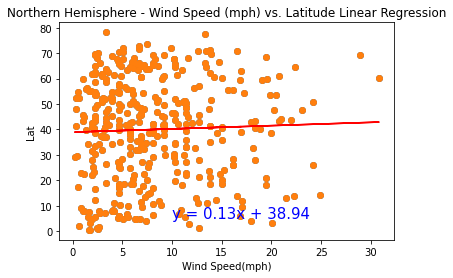

In [32]:
# Create scatter plot and determine line of regression for Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression¶
plt.scatter(northen_hemisphere['Wind Speed'],northen_hemisphere['Lat'])
x = northen_hemisphere['Wind Speed']
y = northen_hemisphere['Lat']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between Wind Speed (mph) and Latitiude on the Northern Hemisphere is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(10,5),fontsize=15,color="blue")

# Add labels and title to plot
plt.xlabel("Wind Speed(mph)")
plt.ylabel("Lat")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig("../output_data/Northern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Wind Speed (mph) and Latitiude on the Northern Hemisphere is -0.3.


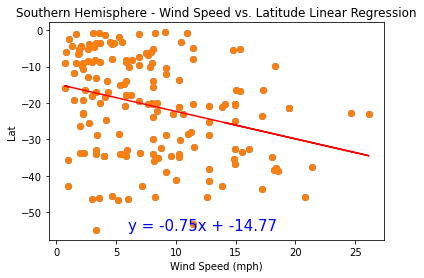

In [33]:
# Create scatter plot and determine line of regression for Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression¶
plt.scatter(southern_hemisphere['Wind Speed'],southern_hemisphere['Lat'])
x = southern_hemisphere['Wind Speed']
y = southern_hemisphere['Lat']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between Wind Speed (mph) and Latitiude on the Northern Hemisphere is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(6,-55),fontsize=15,color="blue")

# Add labels and title to plot
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Lat")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig("../output_data/Southern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression.png")
plt.show()